# Analysis of Life Expectancy and GDP
With data from 6 countries, an analysis will be made to determine if there is a correlation between these 2 factors.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Inspection of the data
In the csv file `all_data.csv` there is data for the evolution of GDP and Life Expectancy at birth for 6 different countries:

* Chile (South America)
* China (Asia)
* Germany (Europe)
* Mexico (Central America)
* U.S.A. (North America)
* Zimbabwe (Africa)

As we can see, every continent (except Oceania) is represented for a single country.

The dataset spans from the year 2000 to the year 2015.

__Note__: The columns where renamed to follow Python\'s variable naming conventions, to facilitate working with them in `pandas`

In [3]:
data = pd.read_csv('all_data.csv')
data.rename(columns = {'Country':'country', 
                       'Year':'year', 
                       'Life expectancy at birth (years)':'life_expectancy',
                       'GDP':'gdp'}, 
            inplace = True)
data.head(8)

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11


The columns describe the following:

* `country` - nation
* `year` - the year for the observation
* `life_expectancy` - life expectancy value in years at birth
* `gdp` - Gross Domestic Product in U.S. dollars


## Analysis of Life Expectancy

In this section of the analysis I will try to answer the following questions.

* Has Life Expectancy At Birth increased during the 2000 - 2015 period?
* Has it increased the same in all these countries?

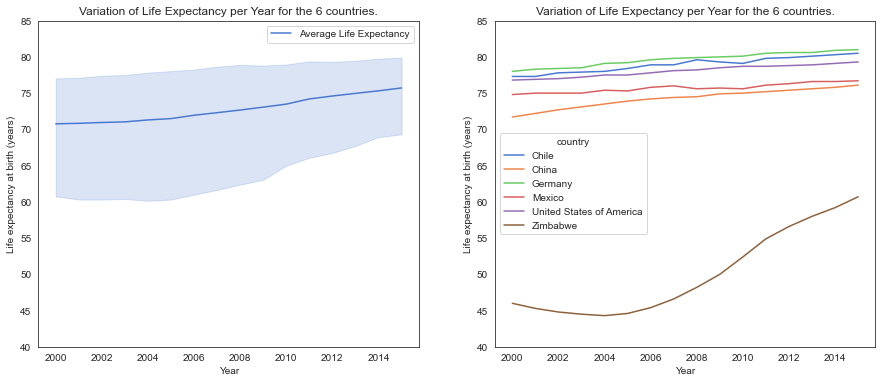

In [22]:
sns.set_palette('muted')
sns.set_style('white')

plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1)
sns.lineplot(data = data, x = 'year', y = 'life_expectancy', label = 'Average Life Expectancy')
ax.set_title('Variation of Life Expectancy per Year for the 6 countries.')
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy at birth (years)')
plt.ylim(40,85)

ax = plt.subplot(1,2,2)
sns.lineplot(data = data, x = 'year', y = 'life_expectancy', hue = 'country')
ax.set_title('Variation of Life Expectancy per Year for the 6 countries.')
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy at birth (years)')
plt.ylim(40,85)
plt.show()

From the plot to the left we can see that the _average_ life expectancy of the 6 countries in the dataset has been steadly increasing in the 15 year period here studied. We can also observe that the 95% confidence interval (denoted as a green band) for each year has decreased over the years, this means that the data for all 6 countries is getting closer to the mean.

From the plot to the right, we can see that Zimbabwe has the lowest Life Expectancy At Birth but has made incredible improvements in this index in the 15 years lapse studied. In the following set of plots we will study each country on their own.

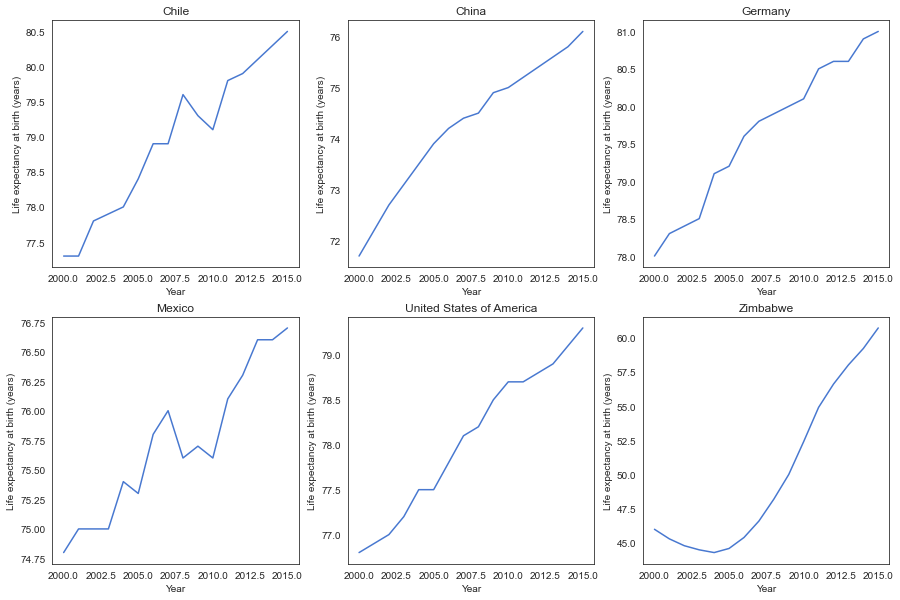

In [23]:
list_of_countries = data.country.unique().tolist()

plt.figure(figsize=(15,10))
for i in range(len(list_of_countries)):
    country_name = list_of_countries[i]
    data_country = data[data.country == country_name]
    
    ax = plt.subplot(2,3,i + 1)
    sns.lineplot(data = data_country, x = 'year', y = 'life_expectancy')
    ax.set_title(country_name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Life expectancy at birth (years)')
    
plt.show()

Noteworthy conclusions from this are as follows:

* Zimbabwe increased its Life Expectancy At Birth by 15 years in the period (aprox).
* Mexico and Chile had years with lower Life Expectancy than the year before.


## Analysis of Gross Domestic Product (GDP)

In this section of the analysis I will try to answer the following questions.

* Has GDP increased during the 2000 - 2015 period overall and for each country?

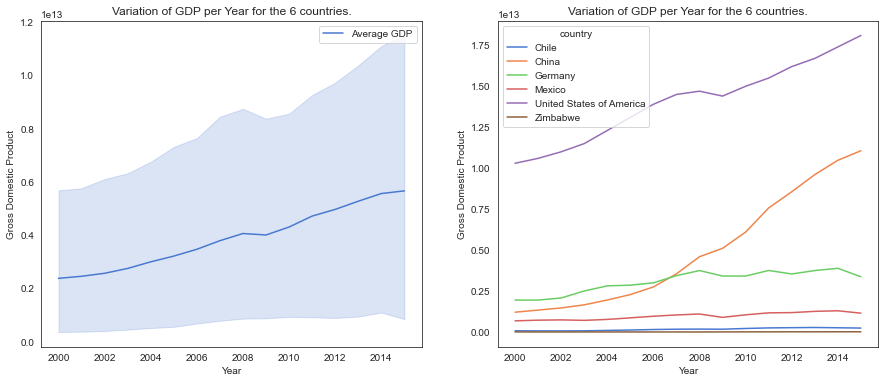

In [24]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1)
sns.lineplot(data = data, x = 'year', y = 'gdp', label = 'Average GDP')
ax.set_title('Variation of GDP per Year for the 6 countries.')
ax.set_xlabel('Year')
ax.set_ylabel('Gross Domestic Product')


ax = plt.subplot(1,2,2)
sns.lineplot(data = data, x = 'year', y = 'gdp', hue = 'country')
ax.set_title('Variation of GDP per Year for the 6 countries.')
ax.set_xlabel('Year')
ax.set_ylabel('Gross Domestic Product')
plt.show()

In the plot above we can see that the GDP of the 6 countries studied has increased overall. We can also see that the 95% confidence interval has also widened. This means that there is a greater disparity in the GDP of the countries in recent years than in previous. We can also see this difference in the plot to the right. On this plot we can also observe the substancial increase of GDP of china and USA.

## Analysis of the relationship between GDP and Life  Expectancy

In this section of the analysis I will try to answer the following questions.

* Has Life Expectancy been increasing linearly with GDP?
* Is there a linear relationship between GDP and Life Expectancy?

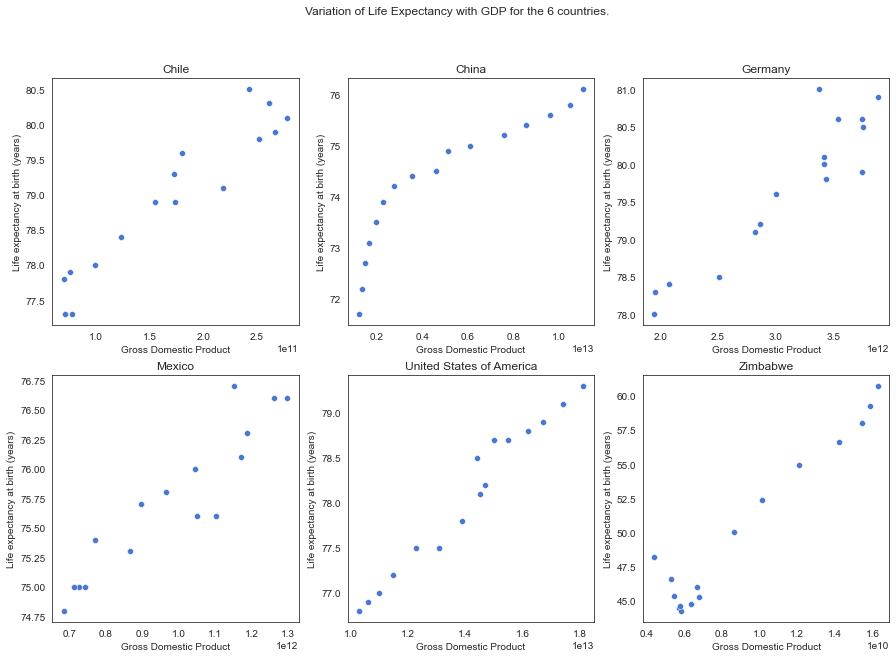

In [30]:
list_of_countries = data.country.unique().tolist()

plt.figure(figsize=(15,10))
plt.suptitle('Variation of Life Expectancy with GDP for the 6 countries.')
for i in range(len(list_of_countries)):
    country_name = list_of_countries[i]
    data_country = data[data.country == country_name]
    
    ax = plt.subplot(2,3,i + 1)
    sns.scatterplot(data = data_country, x = 'gdp', y = 'life_expectancy')
    ax.set_title(country_name)
    ax.set_xlabel('Gross Domestic Product')
    ax.set_ylabel('Life expectancy at birth (years)')
    
plt.show()

From the above plots we can see that for China the relationship isn't linear. This is probably due to a rapid growth in GDP as shown above. 

For countries like Mexico, Chile and USA, the GDP has a mostly linear relationship with Life Expectancy. However, in the case of Germany, since the GDP has remained mostly constant in the last few years, there is a cluster of values on that sector.

In the case of Zimbabwe, there is a decrease of Life Expectancy with an increase in GDP. That is probably due to an outside cause that is beyond the scope of this report.

## Analysis of the relationship between GDP and Life  Expectancy

The following conclusions can be drawn from this analysis:

* Germany has a notoriously high Life Expectancy considering its GDP is an order of magnitude less than USA and China. This is even more evident in the case of Chile whose GDP is 2 orders of magnitud less than China and USA.

* Zimbabwe has made notorious improvements in both GDP and Life Expectancy but still has very low values considering its GDP is a magnitud less than Chile but its Life Expectancy is almost 20 years less than Chile.

* Both the GDP and the Life Expectancy is increasing over time for all 6 countries studied.
